length: 11
['#ffe3d0', '#7a7373', '#616573', '#3c3947', '#ffe8d8', '#e4d0c1', '#8b98c4', '#5a687e', '#363636', '#ffffff', '#000000']
Size  375 480
Image mode:  RGB


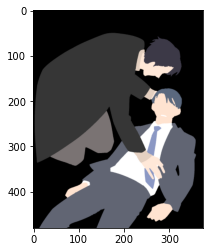

In [1]:
import cv2
import numpy as np
from PIL import Image,ImageDraw,ImageColor,ImageFont
import matplotlib.pyplot as plt
import matplotlib
import webcolors
import os
#################### Global variables ##########################

# file_name='resized0032_back_flat'
# file_name2="0032_back_flat"

# file_name='resized0061_right_flat'
# file_name2="0061_right_flat"

# file_name='resized10004_back_flat'
# file_name2="0004_back_flat"

# file_name='resized0009_right_flat'
# file_name2="0009_right_flat"

file_name='resized0019_top_flat'
file_name2="0019_top_flat"

# file_name='resized0228_right_flat'
# file_name2="0228_right_flat"

####################################################
def show_image(img):
    print("Size ",img.shape[1],img.shape[0])
#     plt.imshow(img, interpolation='nearest')
#     plt.show()
#     img = Image.fromarray(img)
#     print("Image mode: ",img.mode)
    plt.imshow(img)
    img = Image.fromarray(img)
    print("Image mode: ",img.mode)
####################################################

def getHexColorPalette(file_path):
    img=Image.open(file_path)
    colors = img.convert('RGB').getcolors()
    colorlist=[]

    for i in range(len(colors)):
        colorlist.append(webcolors.rgb_to_hex(colors[i][1]))
        
    print("length:",len(colorlist))
    return colorlist

def getRGBColorPalette(file_path):
    img=Image.open(file_path)
    colors = img.convert('RGB').getcolors()
    colorlist=[]

    for i in range(len(colors)):
        colorlist.append(colors[i][1])
        
    print("length:",len(colorlist))
    return colorlist
####################################################
file_path ='resized/'+file_name+'.png'
file_path2='sampleImages/'+file_name2+'.png'
cv_img = cv2.imread(file_path)

####################################################
topclr_list=getHexColorPalette(file_path2)
print(topclr_list)
show_image(cv_img)

length: 11
[255 227 208]


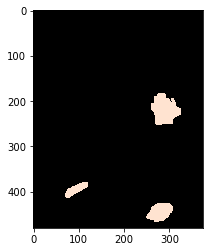

[122 115 115]


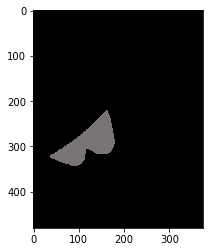

[ 97 101 115]


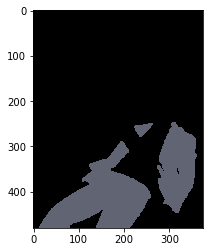

[60 57 71]


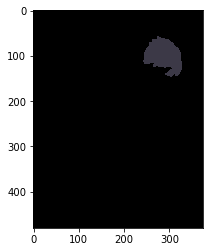

[255 232 216]


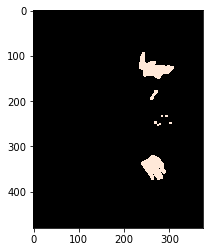

[228 208 193]


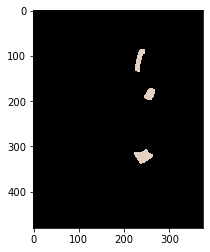

[139 152 196]


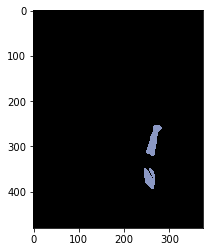

[ 90 104 126]


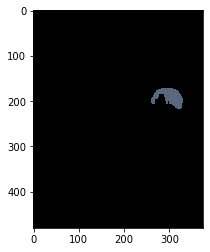

[54 54 54]


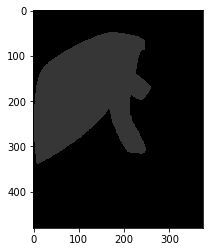

[255 255 255]


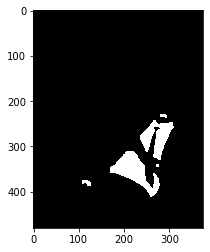

[0 0 0]


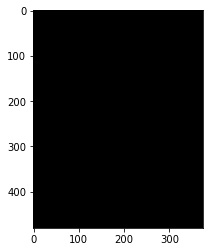

In [2]:
def getLowRGB(colorList):
    rgb_palette=colorList
    low_rgb=[]
    for i in rgb_palette:
        rgb1=i
        val=[]
        for i in range(len(rgb1)):
            if(rgb1[i]!=0):
                val.append(abs(rgb1[i] - 1))
            else:
                val.append(rgb1[i])
        rgb2=(val[0],val[1],val[2])
        np_rgb = np.asarray(rgb2)
        low_rgb.append(np_rgb)
    return low_rgb
    
def getHighRGB(colorList):
    rgb_palette=colorList
    high_rgb=[]
    for i in rgb_palette:
        rgb1=i
        val=[]
        for i in range(len(rgb1)):
            rgb2=(rgb1[0],rgb1[1],rgb1[2])
        np_rgb = np.asarray(rgb2)
        high_rgb.append(np_rgb)
    return high_rgb

def DilateImage2(img):
    cv2.imshow('Original', img)
    kernel = np.ones((5, 5), 'uint8')
    dilate_img = cv2.dilate(img, kernel, iterations=1)
    return dilate_img

def GetMaskSegment(rgb_image,colorList):
    low=getLowRGB(colorList)
    high=getHighRGB(colorList)
    
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        res= DilateImage2(res)
        imglists.append([res,high[i]])
        
    return imglists

def show_imglist(img_list):
    for i in range(len(img_list)):
        print(img_list[i][1])
        plt.imshow(img_list[i][0], interpolation='nearest')
        plt.show()

def FirstMaskSegmentation():
    rgb_colorList=getRGBColorPalette(file_path2)
    img_list=GetMaskSegment(cv_img,rgb_colorList)
    return img_list

show_imglist(FirstMaskSegmentation())

length: 11
[255 227 208]


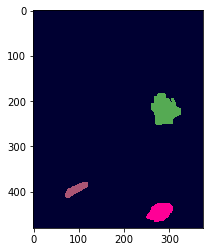

[122 115 115]


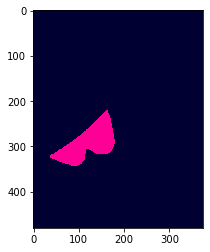

[ 97 101 115]


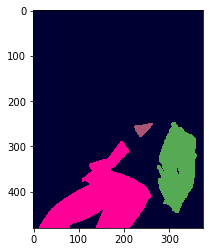

[60 57 71]


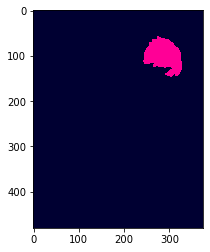

[255 232 216]


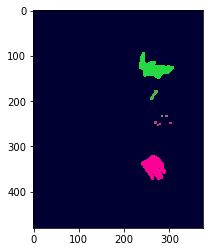

[228 208 193]


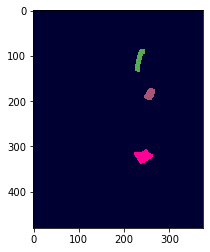

[139 152 196]


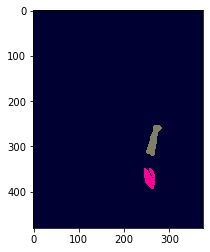

[ 90 104 126]


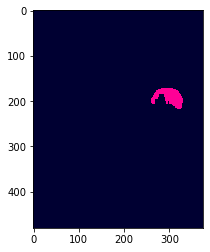

[54 54 54]


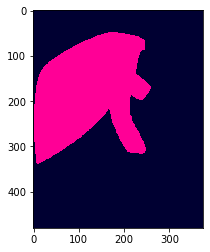

[255 255 255]


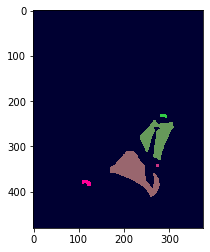

[0 0 0]


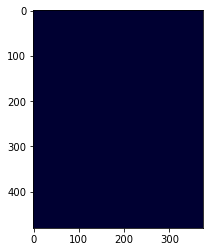

In [3]:
def apply_lut(src, lut):
    dst = lut[src]
    return dst

def ComponentLabeling(img):
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    n_components, component_ids = cv2.connectedComponents(mask)

    # Initialize look up tables with arbitrary data for demonstration
    LUT1 = np.linspace(0, 255, n_components).astype(np.uint16)
    LUT2 = np.linspace(255, 0, n_components).astype(np.uint16)
    LUT3 = np.linspace(50, 150, n_components).astype(np.uint16)
    LUT2[0] = 0
    
    r = apply_lut(component_ids, LUT1)
    g = apply_lut(component_ids, LUT2)
    b = apply_lut(component_ids, LUT3)

    rgb = np.dstack((r, g, b)).astype(np.uint8)
    
    return rgb

def RGBtoGrayImage(rgbimg):
    grayImage = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2GRAY)
    (thresh, im_bw) = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return im_bw

def GetLabel_imglist(img_list):
    label_imglist=[]
    for i in range(len(img_list)):
        gray_im=RGBtoGrayImage(img_list[i][0])
        label_img=ComponentLabeling(gray_im)
        label_imglist.append([label_img,img_list[i][1]])
    return label_imglist

img_list=FirstMaskSegmentation()
show_imglist(GetLabel_imglist(img_list))

In [4]:
def GetAllPixValues(img):
    print("Getting all pixel list...")
    rows,cols,_ = img.shape
    pixlist=[]
    for i in range(rows):
        for j in range(cols):
            pixlist.append(webcolors.rgb_to_hex(img[i,j]))
    print("length:",len(pixlist))
    return pixlist


def getUniqueListValue(Inputlist):
    print("Getting unique values of the list...")
    unique_list = []
    for x in Inputlist:
        if x not in unique_list:
            unique_list.append(x)
    
    print("length:",len(unique_list))
    return unique_list

def SeeOccurrences(test_list):
    print("Getting occurred list...")
    res = []
    count = 1
    for ele in range(0, len(test_list) -1):
        if test_list[ele] != test_list[ele + 1]:
            res.append((test_list[ele],count))
            count = 1
        else :
            count = count + 1
    res.append((test_list[len(test_list) -1], count))
    
    print("length:",len(res))
    return res

def RemoveSpecificValue(input_list,val):
    new_list=[]
    for i in input_list:
        if(i!=val):
            new_list.append(i)
    return new_list

def GetBgPixVal(img):
    (r,g,b) = img[0, 0]
    a='#%02x%02x%02x' % (r,g,b)
    return a

length: 11
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 3
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 3
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 7
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 3
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 2
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel lis

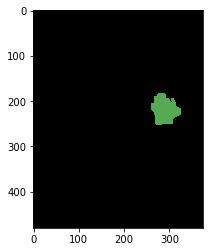

[255 227 208]


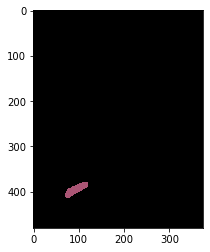

[255 227 208]


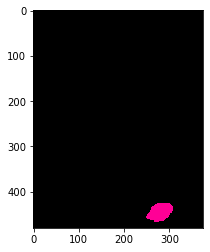

[122 115 115]


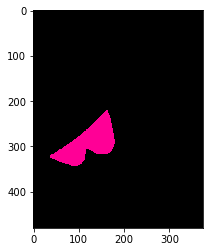

[ 97 101 115]


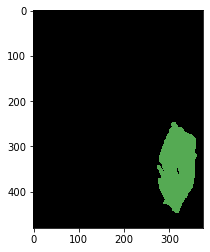

[ 97 101 115]


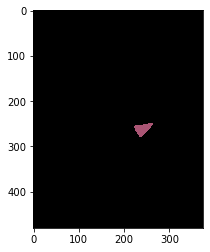

[ 97 101 115]


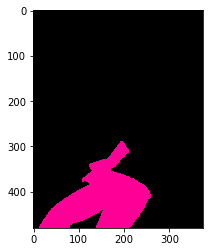

[60 57 71]


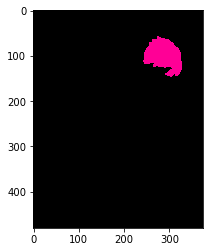

[255 232 216]


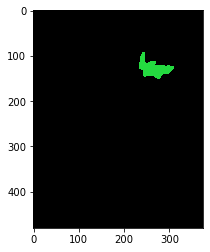

[255 232 216]


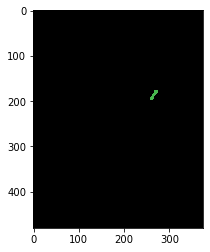

[255 232 216]


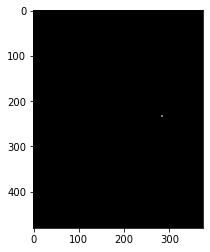

[255 232 216]


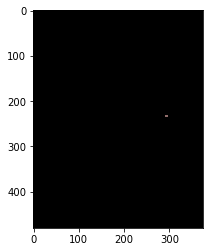

[255 232 216]


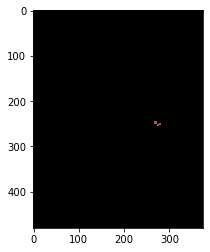

[255 232 216]


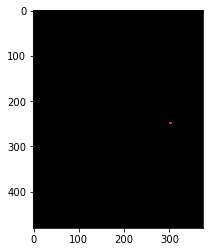

[255 232 216]


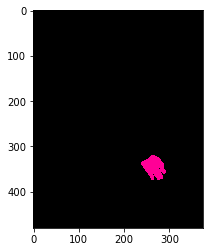

[228 208 193]


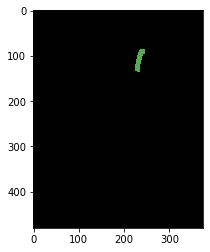

[228 208 193]


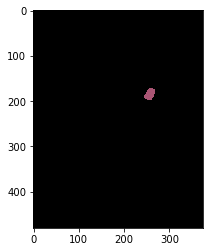

[228 208 193]


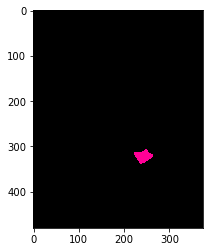

[139 152 196]


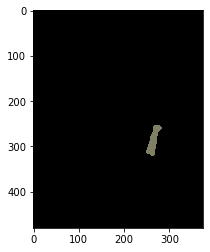

[139 152 196]


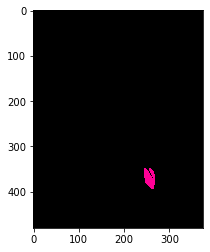

[ 90 104 126]


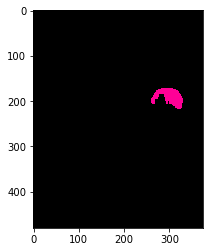

[54 54 54]


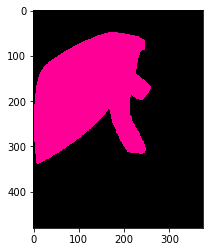

[255 255 255]


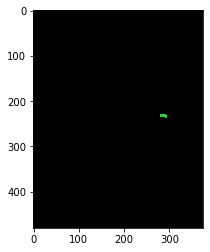

[255 255 255]


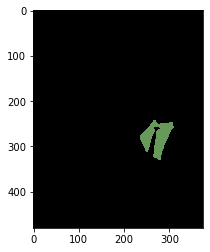

[255 255 255]


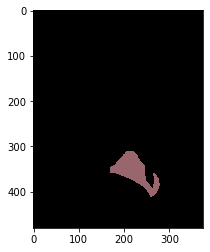

[255 255 255]


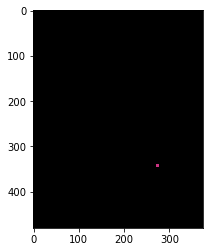

[255 255 255]


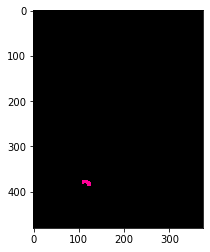

In [5]:
def hexTOrgb(input_list):
    print("converting hexlist to rgblist...")
    rgb_list=[]
    for i in input_list:
        rgb_list.append(ImageColor.getcolor(i, "RGB"))
    return rgb_list

def getColorPalette(img): 
    label_pix=GetAllPixValues(img)
    BgPix=GetBgPixVal(img)
    label_pix=RemoveSpecificValue(label_pix,BgPix) 
    unq_label_pix=getUniqueListValue(label_pix)
    
    return unq_label_pix

def GetSecondMaskSegment(rgb_image,colorList):
    low=getLowRGB(colorList)
    high=getHighRGB(colorList)
    
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        imglists.append(res)
        
    return imglists

def SecondMaskSegmentation():
    img_list2=[]
    img_list=FirstMaskSegmentation()
    label_imglist=GetLabel_imglist(img_list)
    for i in range(len(label_imglist)):
        img=label_imglist[i][0]
        colorname=label_imglist[i][1]
        colorlist=getColorPalette(img)
        colorlist=hexTOrgb(colorlist)
        sec_imglist=GetSecondMaskSegment(img,colorlist)
        for j in sec_imglist:
            img_list2.append([j,colorname])
    return img_list2
        
show_imglist(SecondMaskSegmentation())

In [6]:
region_list=SecondMaskSegmentation()

length: 11
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 3
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 3
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 7
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 3
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 2
converting hexlist to rgblist...
Getting all pixel list...
length: 180000
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel lis

In [7]:
region_colorlist=[]
for i in range(len(region_list)):
    colorval=tuple(region_list[i][1])
    colorval='#%02x%02x%02x' % colorval
    region_colorlist.append(colorval)
print(region_colorlist)

['#ffe3d0', '#ffe3d0', '#ffe3d0', '#7a7373', '#616573', '#616573', '#616573', '#3c3947', '#ffe8d8', '#ffe8d8', '#ffe8d8', '#ffe8d8', '#ffe8d8', '#ffe8d8', '#ffe8d8', '#e4d0c1', '#e4d0c1', '#e4d0c1', '#8b98c4', '#8b98c4', '#5a687e', '#363636', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff']


In [8]:
def DilateImage(img):
    cv2.imshow('Original', img)
    kernel = np.ones((5, 5), 'uint8')
    dilate_img = cv2.dilate(img, kernel, iterations=2)
#     plt.imshow(dilate_img, interpolation='nearest')
#     plt.show()
    
    return dilate_img

def CheckConnectivity(img):
    connection=False
    unq_val=np.unique(img.reshape(-1, img.shape[2]), axis = 0)
    total_unqval= len(unq_val)-1
    if(total_unqval==1):
        connection=True
    else:
        connection=False
    return connection

def RegionConnectivity(region1, region2):
#     region1=DilateImage(region1)
#     region2=DilateImage(region2)
    merged_region=region1+region2
    merged_region=RGBtoGrayImage(merged_region)
    merged_region=ComponentLabeling(merged_region)
#     show_image(merged_region)
    check_con=CheckConnectivity(merged_region)
    return check_con
    
# RegionConnectivity(region_list[16][0], region_list[17][0])
    

In [9]:
#####################Network Creation####################
# def CreateNode(list):
#     print("Getting nodes for the network...")
#     Nodelist=[]
#     c=0
#     for x in list:
#         Nodelist.append(x+str(c))
#         c=c+1
#     return Nodelist

# def BuildNetwork(node,feature):
#     print("Building the network...")
#     from pyvis.network import Network
#     net=Network()
#     net.add_nodes(node,label=feature,color=feature)
#     test_list = node
#     res = [[test_list[i], test_list[i + 1]]
#             for i in range(len(test_list) - 1)]
# #     print("The consecutive element paired list is : " + str(res))
#     net.add_edges(res)
#     net.show("hello.html")
    
from pyvis.network import Network
net=Network()
    
region_clrlist=[]
node_list=[]
edge_list=[]
for k in range(len(region_list)):
    print("loop ",k)
    compare_img=region_list[k][0]
    for i in range(len(region_list)):
        if(i!=k):
            colorval=tuple(region_list[i][1])
            colorval='#%02x%02x%02x' % colorval
            node_list.append(i)
            region_clrlist.append(colorval)
            check= RegionConnectivity(compare_img,region_list[i][0])
            if(check==True):
                edge_tuple=(k,i)
                edge_list.append(edge_tuple)

                                                      
print(edge_list)
print(region_clrlist)

net.add_nodes(node_list,label=region_clrlist,color=region_clrlist)
net.add_edges(edge_list)
    
net.show("hello.html") 

# print("hello")

loop  0
loop  1
loop  2
loop  3
loop  4
loop  5
loop  6
loop  7
loop  8
loop  9
loop  10
loop  11
loop  12
loop  13
loop  14
loop  15
loop  16
loop  17
loop  18
loop  19
loop  20
loop  21
loop  22
loop  23
loop  24
loop  25
loop  26
[(0, 4), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 18), (0, 20), (0, 22), (0, 23), (1, 6), (1, 26), (2, 4), (3, 21), (4, 0), (4, 2), (4, 13), (4, 14), (4, 23), (4, 24), (4, 25), (5, 21), (5, 23), (6, 1), (6, 21), (6, 24), (6, 26), (7, 8), (7, 15), (8, 7), (8, 15), (9, 0), (9, 16), (9, 20), (10, 0), (10, 22), (11, 0), (11, 22), (12, 0), (12, 18), (12, 23), (13, 0), (13, 4), (13, 23), (14, 4), (14, 17), (14, 18), (14, 19), (14, 23), (14, 24), (14, 25), (15, 7), (15, 8), (15, 21), (16, 9), (16, 20), (16, 21), (17, 14), (17, 18), (17, 21), (17, 23), (17, 24), (18, 0), (18, 12), (18, 14), (18, 17), (18, 21), (18, 23), (19, 14), (19, 24), (20, 0), (20, 9), (20, 16), (21, 3), (21, 5), (21, 6), (21, 15), (21, 16), (21, 17), (21, 18), (21, 23), (21, 24), (22, 